In [2960]:
import pandas as pd
##%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from plotly import graph_objects
import streamlit as st

## My Info

In [2961]:
st.title('Computer Science Capstone — C964')
st.header('Student – Mark Nefzger')
st.header('Student ID: 001411596')

DeltaGenerator()

## Version Info

In [2962]:
pd_ver = pd.__version__
st.write("Pandas version: ", pd_ver)

In [2963]:
np_ver = np.__version__
st.write("Numpy version: ", np_ver)

In [2964]:
st_ver = st.__version__
st.write("Streamlit version: ", st_ver)

In [2965]:
plt_ver = matplotlib.__version__
st.write("Matplotlib version: ", plt_ver)

## Import data

In [2966]:
# Import Data
health_data = pd.read_csv("New Data/oura_2019-01-01_2023-09-09_trends_Shifted.csv")

## View data

In [2967]:
st.header('Imported Data')

DeltaGenerator()

In [2968]:
health_data

,date,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timin Score,Total Sleep Duration,Total Bedtime,Awake Time,REM Sleep Duration,Light Sleep Duration,Deep Sleep Duration,Restless Sleep,Sleep Efficiency,Sleep Latency,Sleep Timing,Bedtime Start,Bedtime End,Average Resting Heart Rate,Lowest Resting Heart Rate,Average HRV,Temperature Deviation (°C),Temperature Trend Deviation,Respiratory Rate,Activity Score,Stay Active Score,Move Every Hour Score,Meet Daily Targets Score,Training Frequency Score,Training Volume Score,Activity Burn,Total Burn,Steps,Equivalent Walking Distance,Inactive Time,Rest Time,Low Activity Time,Medium Activity Time,High Activity Time,Non-wear Time,Average MET,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/13/2021,83.0,79.0,100.0,60.0,96.0,75.0,83.0,100.0,22740.0,27960.0,2460.0,9990.0,12540.0,2970.0,235.0,91.0,540.0,13890.0,2021-01-12T20:58:31.000-07:00,2021-01-13T04:44:31.000-07:00,76.91,68.0,16.0,0.03,NaN,15.625,94.0,69.0,95.0,95.0,100.0,100.0,716.0,2768.0,9892.0,13824.0,36360.0,28200.0,15000.0,6780.0,60.0,0.0,1.65625,1.0,81.0,76.0,NaN,NaN,NaN,100.0,74.0,NaN,99.0
2,1/14/2021,76.0,67.0,95.0,46.0,93.0,79.0,72.0,100.0,23760.0,25560.0,2820.0,6420.0,13980.0,2340.0,237.0,89.0,270.0,12900.0,2021-01-13T21:35:07.000-07:00,2021-01-14T04:41:07.000-07:00,64.48,59.0,20.0,-0.28,0.02,16.000,91.0,47.0,100.0,95.0,100.0,99.0,488.0,2670.0,10903.0,9223.0,46680.0,13200.0,23160.0,3360.0,0.0,0.0,1.62500,0.0,80.0,71.0,NaN,90.0,NaN,92.0,93.0,NaN,69.0
3,1/15/2021,78.0,72.0,98.0,95.0,100.0,79.0,67.0,49.0,23190.0,24840.0,1080.0,7980.0,11010.0,4770.0,251.0,96.0,150.0,12210.0,2021-01-15T01:17:22.000-07:00,2021-01-15T08:11:22.000-07:00,83.52,77.0,13.0,0.24,0.33,17.125,95.0,77.0,95.0,95.0,100.0,100.0,1474.0,3568.0,14215.0,27529.0,30720.0,21840.0,15420.0,8400.0,5520.0,4500.0,2.12500,1.0,64.0,75.0,85.0,86.0,88.0,76.0,57.0,NaN,96.0
4,1/16/2021,69.0,69.0,97.0,60.0,98.0,70.0,67.0,27.0,24060.0,25080.0,1890.0,7530.0,12690.0,2970.0,241.0,92.0,150.0,12180.0,2021-01-16T02:02:00.000-07:00,2021-01-16T09:00:00.000-07:00,78.64,71.0,15.0,0.05,0.34,16.500,97.0,77.0,100.0,100.0,100.0,100.0,372.0,2403.0,8606.0,7090.0,31500.0,35040.0,17700.0,2100.0,60.0,0.0,1.40625,0.0,78.0,60.0,84.0,11.0,58.0,98.0,81.0,NaN,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,7/22/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,100.0,95.0,43.0,71.0,67.0,129.0,2083.0,2836.0,2590.0,16980.0,20820.0,6120.0,420.0,0.0,42060.0,1.21875,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,7/29/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,100.0,100.0,60.0,96.0,96.0,420.0,2499.0,8834.0,8084.0,13140.0,20700.0,22560.0,1440.0,60.0,28500.0,1.46875,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,7/31/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,100.0,100.0,60.0,71.0,68.0,1.0,1889.0,30.0,29.0,840.0,22980.0,120.0,0.0,0.0,62460.0,1.12500,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
969,8/7/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,68.0,95.0,60.0,71.0,91.0,235.0,2295.0,5656.0,4575.0,36120.0,22140.0,11100.0,1380.0,0.0,15660.0,1.34375,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2969]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         970 non-null    object 
 1   Sleep Score                  898 non-null    float64
 2   Total Sleep Score            898 non-null    float64
 3   REM Sleep Score              898 non-null    float64
 4   Deep Sleep Score             898 non-null    float64
 5   Sleep Efficiency Score       898 non-null    float64
 6   Restfulness Score            898 non-null    float64
 7   Sleep Latency Score          898 non-null    float64
 8   Sleep Timin Score            898 non-null    float64
 9   Total Sleep Duration         896 non-null    float64
 10  Total Bedtime                896 non-null    float64
 11  Awake Time                   896 non-null    float64
 12  REM Sleep Duration           896 non-null    float64
 13  Light Sleep Duration

## Describe Data

In [2970]:
health_data.describe()

,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timin Score,Total Sleep Duration,Total Bedtime,Awake Time,REM Sleep Duration,Light Sleep Duration,Deep Sleep Duration,Restless Sleep,Sleep Efficiency,Sleep Latency,Sleep Timing,Average Resting Heart Rate,Lowest Resting Heart Rate,Average HRV,Temperature Deviation (°C),Temperature Trend Deviation,Respiratory Rate,Activity Score,Stay Active Score,Move Every Hour Score,Meet Daily Targets Score,Training Frequency Score,Training Volume Score,Activity Burn,Total Burn,Steps,Equivalent Walking Distance,Inactive Time,Rest Time,Low Activity Time,Medium Activity Time,High Activity Time,Non-wear Time,Average MET,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,895.000000,895.000000,895.000000,883.000000,866.000000,896.000000,970.000000,968.000000,968.000000,968.000000,968.000000,968.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,898.000000,888.000000,892.000000,881.000000,887.000000,895.000000,898.000000,887.000000,898.000000
mean,81.312918,78.945434,92.697105,76.091314,91.908686,79.702673,75.110245,81.119154,24766.305804,27514.455357,2748.149554,8354.363839,12654.174107,3757.767857,182.101562,90.017857,455.892857,13637.712054,71.945508,63.225698,14.570950,0.009196,0.100635,16.138951,88.117526,74.162190,96.690083,79.923554,93.414256,95.533058,512.113402,2574.584536,10282.777320,10076.840206,32918.597938,27949.051546,18024.494845,3517.422680,253.298969,3676.639175,1.523518,0.380412,77.174833,77.502252,84.540359,86.491487,82.816234,93.912849,71.041203,73.838782,63.732739
std,9.733865,17.745517,14.551014,24.942353,11.508831,8.964168,11.154838,29.034102,4974.243254,5548.685874,1848.589758,3449.478600,3955.587207,1797.705781,61.910927,6.196026,455.934531,2916.000324,7.299476,6.367072,3.904515,0.241722,0.163059,0.931832,11.595905,15.488446,9.972196,25.427968,17.984564,10.356567,212.288434,247.125768,4040.565424,4222.191404,8176.296007,7271.821530,5833.111315,2025.788831,667.289732,8165.531362,0.152383,0.634921,10.395070,20.125312,13.688516,16.203962,9.870439,12.380037,31.916374,15.558814,27.610886
min,21.000000,1.000000,1.000000,1.000000,1.000000,42.000000,1.000000,1.000000,90.000000,1081.000000,570.000000,0.000000,90.000000,0.000000,0.000000,8.000000,0.000000,720.000000,55.760000,52.000000,5.000000,-0.880000,-0.480000,12.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1889.000000,0.000000,0.000000,360.000000,1380.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,35.000000,0.000000,6.000000,1.000000,43.000000,0.000000,0.000000,22.000000,0.000000
25%,76.250000,68.000000,95.000000,60.000000,90.000000,74.000000,67.000000,67.000000,21982.500000,24420.000000,1560.000000,6030.000000,10110.000000,2460.000000,137.750000,88.000000,210.000000,11970.000000,66.540000,58.000000,12.000000,-0.110000,0.000000,15.625000,84.000000,65.000000,95.000000,60.000000,100.000000,96.000000,372.000000,2414.250000,7686.500000,7231.250000,28215.000000,23955.000000,14280.000000,1995.000000,0.000000,0.000000,1.437500,0.000000,71.000000,67.000000,77.750000,82.000000,78.000000,93.000000,50.000000,64.000000,41.000000
50%,83.000000,82.000000,98.000000,87.500000,96.000000,81.000000,72.000000,100.000000,24900.000000,27540.000000,2250.000000,7890.000000,12840.000000,3585.000000,178.000000,91.000000,330.000000,13635.000000,71.480000,62.000000,14.000000,-0.010000,0.090000,16.250000,92.000000,73.000000,100.000000,95.000000,100.000000,98.000000,482.500000,2548.500000,974

## Set up dataframe

In [2971]:
df = pd.DataFrame(health_data)

## Convert Sleep Duration and Rest Time to hours

In [2972]:
df["Total Sleep Duration"] = df["Total Sleep Duration"] / 3600
df["Rest Time"] = df["Rest Time"] / 3600

In [2973]:
pd.crosstab(df["Total Sleep Duration"] > 7, df["Readiness Score"] >85)

Readiness Score,False,True
Total Sleep Duration,,
False,494,47
True,279,151


<Axes: >

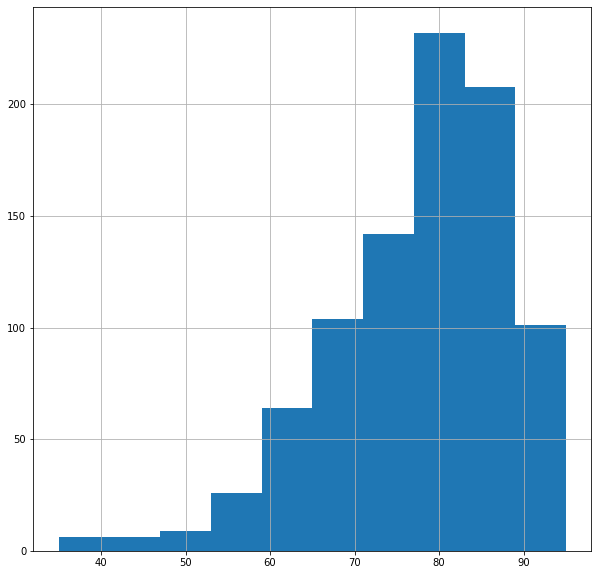

In [2974]:
(df["Readiness Score"].hist(figsize=(10, 10)))

## Manipulating Data

In [2975]:
df.dropna(inplace=True)

In [2976]:
# Randomize data 1 = 100%
df.sample(frac=1)

,date,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timin Score,Total Sleep Duration,Total Bedtime,Awake Time,REM Sleep Duration,Light Sleep Duration,Deep Sleep Duration,Restless Sleep,Sleep Efficiency,Sleep Latency,Sleep Timing,Bedtime Start,Bedtime End,Average Resting Heart Rate,Lowest Resting Heart Rate,Average HRV,Temperature Deviation (°C),Temperature Trend Deviation,Respiratory Rate,Activity Score,Stay Active Score,Move Every Hour Score,Meet Daily Targets Score,Training Frequency Score,Training Volume Score,Activity Burn,Total Burn,Steps,Equivalent Walking Distance,Inactive Time,Rest Time,Low Activity Time,Medium Activity Time,High Activity Time,Non-wear Time,Average MET,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
584,9/15/2022,84.0,85.0,100.0,41.0,100.0,86.0,75.0,100.0,7.300000,26760.0,1260.0,8850.0,15060.0,1590.0,245.0,95.0,390.0,13380.0,2022-09-14T21:33:04.000-06:00,2022-09-15T04:59:04.000-06:00,69.23,60.0,13.0,-0.01,0.13,15.000,95.0,70.0,100.0,100.0,100.0,98.0,437.0,2460.0,9868.0,8918.0,35580.0,8.583333,16380.0,3480.0,60.0,0.0,1.43750,0.0,73.0,83.0,83.0,100.0,96.0,100.0,100.0,41.0,41.0
53,3/6/2021,74.0,69.0,99.0,69.0,98.0,74.0,70.0,55.0,8.308333,24900.0,1800.0,8490.0,11220.0,3390.0,186.0,93.0,210.0,12060.0,2021-03-06T01:07:48.000-07:00,2021-03-06T08:02:48.000-07:00,79.30,71.0,11.0,0.13,0.24,17.000,87.0,83.0,100.0,60.0,96.0,98.0,597.0,2628.0,8872.0,11893.0,29580.0,9.433333,18240.0,4560.0,60.0,0.0,1.56250,0.0,82.0,62.0,81.0,32.0,95.0,94.0,31.0,68.0,60.0
151,6/16/2021,78.0,79.0,98.0,31.0,83.0,74.0,83.0,100.0,5.591667,30060.0,4530.0,7680.0,16230.0,1620.0,241.0,85.0,1230.0,14460.0,2021-06-15T20:41:32.000-06:00,2021-06-16T05:02:32.000-06:00,71.31,64.0,17.0,0.13,0.28,16.875,93.0,60.0,100.0,100.0,100.0,100.0,496.0,2569.0,11840.0,10058.0,40980.0,6.516667,17520.0,4440.0,0.0,0.0,1.53125,0.0,68.0,68.0,78.0,79.0,78.0,94.0,78.0,86.0,100.0
606,10/16/2022,66.0,62.0,100.0,73.0,81.0,72.0,67.0,16.0,4.858333,24120.0,3780.0,9150.0,8400.0,2790.0,150.0,84.0,180.0,12120.0,2022-10-16T02:58:35.000-06:00,2022-10-16T09:40:35.000-06:00,78.69,68.0,11.0,0.16,0.72,16.250,88.0,94.0,100.0,60.0,96.0,94.0,509.0,2578.0,10711.0,10009.0,23580.0,9.650000,22740.0,2880.0,60.0,2400.0,1.53125,0.0,61.0,38.0,61.0,100.0,83.0,91.0,54.0,53.0,52.0
567,8/27/2022,88.0,88.0,100.0,96.0,93.0,74.0,70.0,99.0,7.783333,26460.0,2370.0,13920.0,7260.0,2910.0,195.0,91.0,270.0,12720.0,2022-08-26T23:26:58.000-06:00,2022-08-27T06:47:58.000-06:00,75.86,68.0,10.0,0.11,0.28,14.250,94.0,81.0,100.0,100.0,100.0,100.0,455.0,2532.0,9384.0,9090.0,29640.0,8.166667,21780.0,2280.0,240.0,3060.0,1.50000,0.0,86.0,94.0,86.0,80.0,78.0,95.0,48.0,87.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,4/2/2021,79.0,80.0,98.0,84.0,100.0,80.0,67.0,41.0,5.450000,27240.0,1380.0,7710.0,14040.0,4110.0,203.0,95.0,150.0,13410.0,2021-04-02T01:12:02.000-06:00,2021-04-02T08:46:02.000-06:00,74.74,67.0,13.0,0.18,0.18,16.875,87.0,81.0,100.0,60.0,100.0,98.0,761.0,2941.0,18278.0,15403.0,31680.0,5.233333,31320.0,4500.0,60.0,0.0,1.75000,0.0,57.0,70.0,97.0,83.0,85.0,89.0,58.0,89.0,41.0
445,4/19/2022,58.0,43.0,78.0,37.0,88.0,74.0,86.0,28.0,5.941667,18360.0,2400.0,4680.0,9780.0,1500.0,97.0,87.0,1170.0,9450.0,2022-04-19T02:45:03.000-06:00,2022-04-19T07:51:03.000-06:00,72.02,62.0,11.0,0.05,0.11,16.000,91.0,72.0,95.0,95.0,96.0,79.0,425.0,2459.0,9453.0,8411.0,34560.0,9.250000,15780.0,2640.0,120.0,0.0,1.43750,1.0,76.0,20.0,83.0,87.0,95.0,100.0,98.0,58.0,23.0
645,11/28/2022,81.0,95.0,100.0,95.0,83.0,73.0,70.0,16.0,6.316667,33060.0,4860.0,13050.0,11310.0,3840.0,196.0,85.0,240.0,16860.0,2022-11-28T01:3

In [2977]:
# Reset index if necessary
# df.reset_index(drop=True, inplace=True)

## Matplotlib

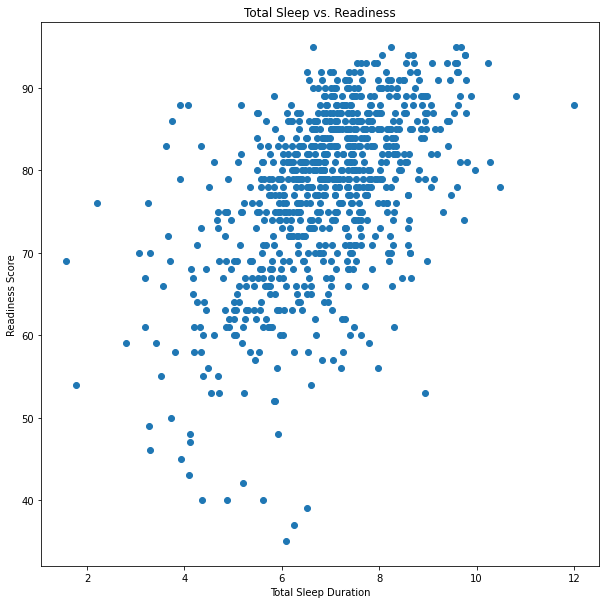

In [2978]:
# 1. Prepare data
x = df["Total Sleep Duration"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Total Sleep vs. Readiness", 
       xlabel="Total Sleep Duration",
       ylabel="Readiness Score")

# 5. Save and show
fig.savefig("Figures/Figure_1.png")

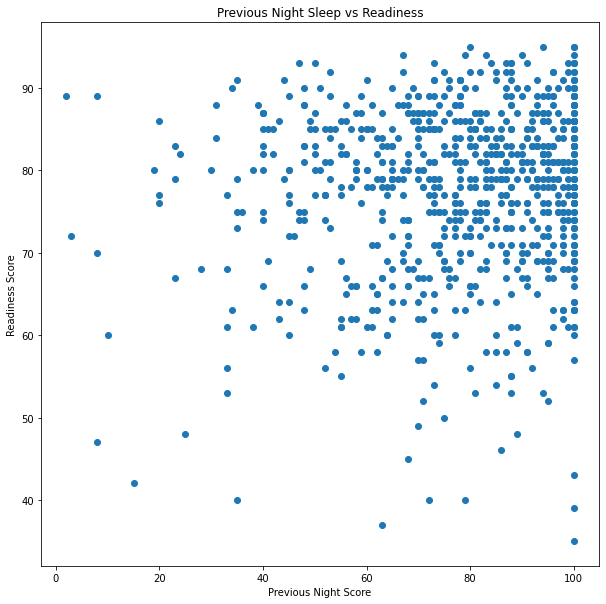

In [2979]:
# 1. Prepare data
x = df["Previous Night Score"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)


# 4. Customize plot
ax.set(title="Previous Night Sleep vs Readiness", 
       xlabel="Previous Night Score",
       ylabel="Readiness Score")

# 5. Save and show 
fig.savefig("Figures/Figure_2.png")

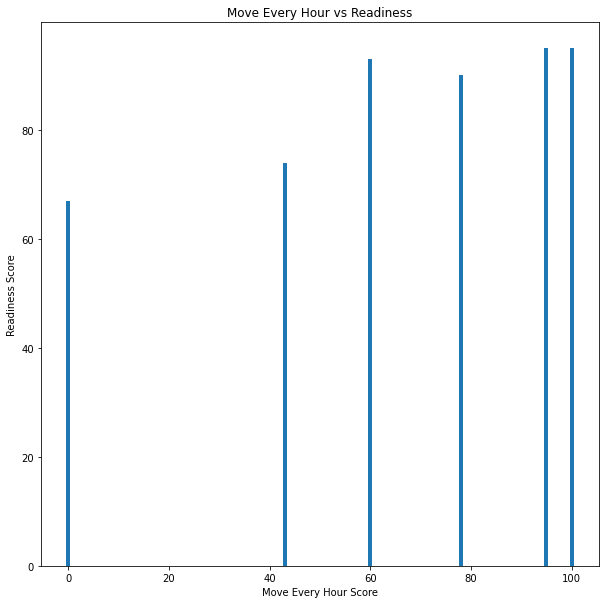

In [2980]:
# 1. Prepare data
x = df["Move Every Hour Score"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.bar(x,y)

# 4. Customize plot
ax.set(title="Move Every Hour vs Readiness", 
       xlabel="Move Every Hour Score",
       ylabel="Readiness Score")

# 5. Save and show 
fig.savefig("Figures/Figure_3.png")

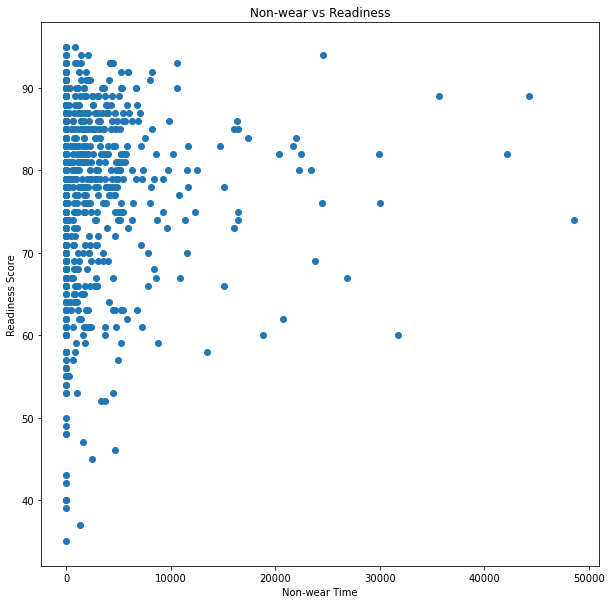

In [2981]:
# 1. Prepare data
x = df["Non-wear Time"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Non-wear vs Readiness", 
       xlabel="Non-wear Time",
       ylabel="Readiness Score")

# 5. Save and show 
fig.savefig("Figures/Figure_4.png")

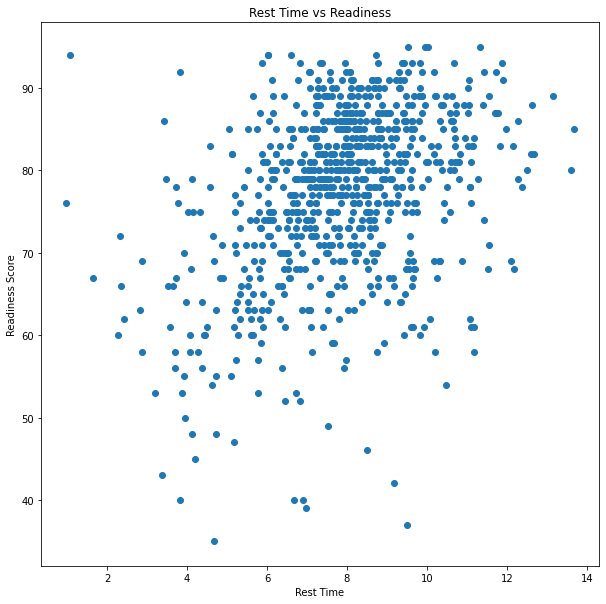

In [2982]:
# 1. Prepare data
x = df["Rest Time"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Rest Time vs Readiness", 
       xlabel="Rest Time",
       ylabel="Readiness Score")

# 5. Save and show 
fig.savefig("Figures/Figure_5.png")

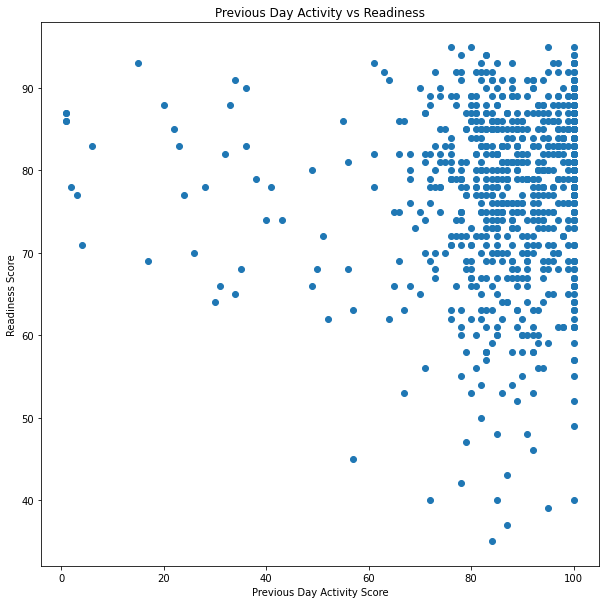

In [2983]:
# 1. Prepare data
x = df["Previous Day Activity Score"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Previous Day Activity vs Readiness", 
       xlabel="Previous Day Activity Score",
       ylabel="Readiness Score")

# 5. Save and show 
fig.savefig("Figures/Figure_6.png")

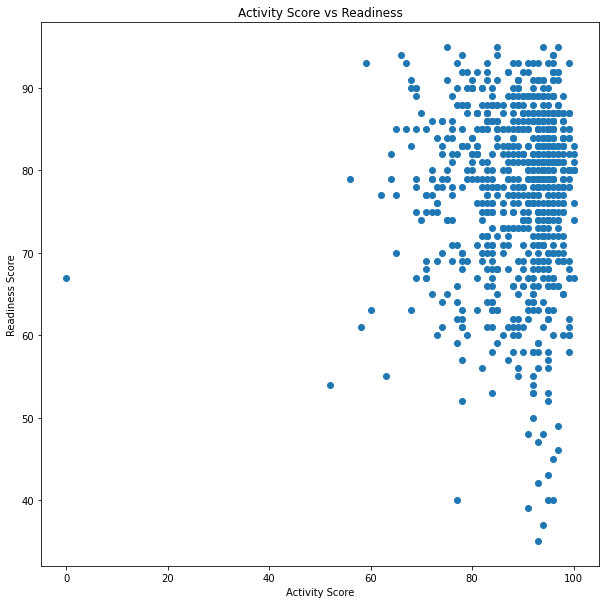

In [2984]:
# 1. Prepare data
x = df["Activity Score"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Activity Score vs Readiness", 
       xlabel="Activity Score",
       ylabel="Readiness Score")

# 5. Save and show 
fig.savefig("Figures/Figure_7.png")

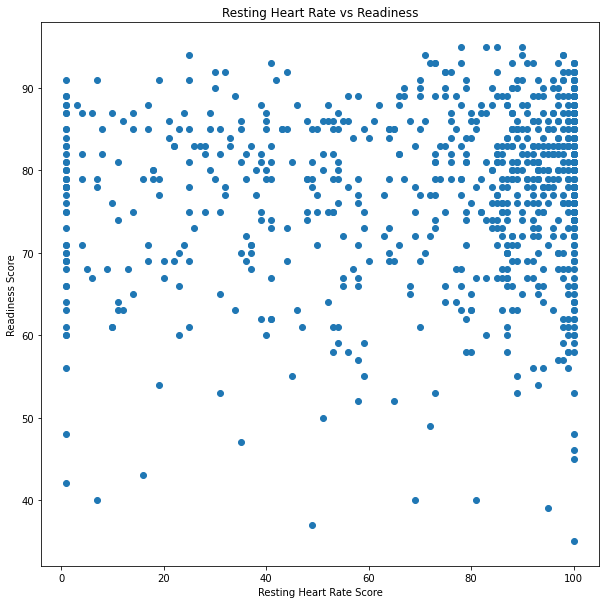

In [2985]:
# 1. Prepare data
x = df["Resting Heart Rate Score"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Resting Heart Rate vs Readiness", 
       xlabel="Resting Heart Rate Score",
       ylabel="Readiness Score")

# 5. Save and show 
fig.savefig("Figures/Figure_8.png")

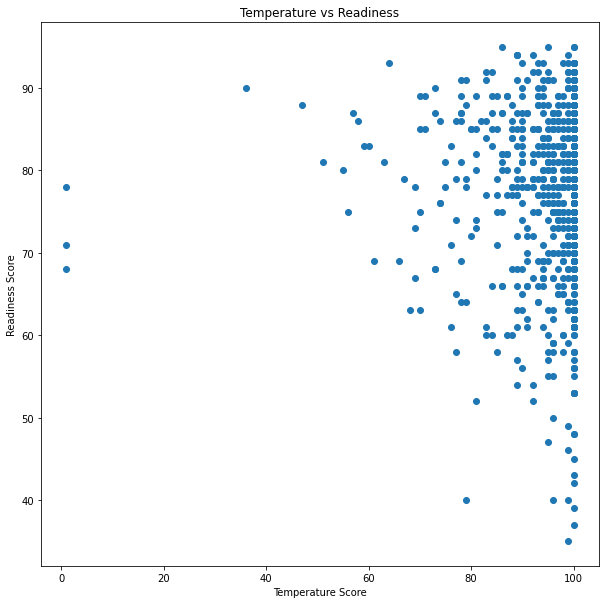

In [2986]:
# 1. Prepare data
x = df["Temperature Score"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Temperature vs Readiness", 
       xlabel="Temperature Score",
       ylabel="Readiness Score")

# 5. Save and show 
fig.savefig("Figures/Figure_9.png")

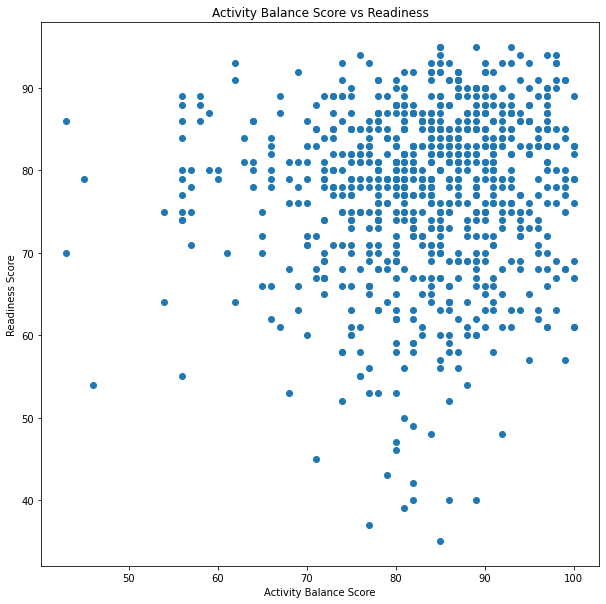

In [2987]:
# 1. Prepare data
x = df["Activity Balance Score"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Activity Balance Score vs Readiness", 
       xlabel="Activity Balance Score",
       ylabel="Readiness Score")

# 5. Save and show 
fig.savefig("Figures/Figure_10.png")

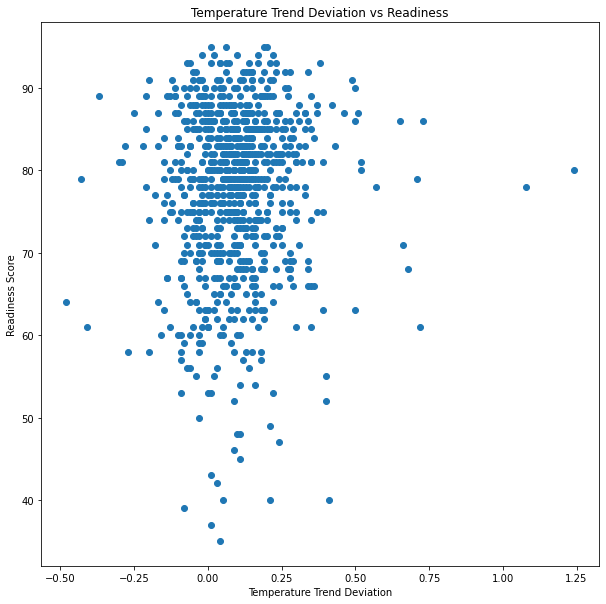

In [2988]:
# 1. Prepare data
x = df["Temperature Trend Deviation"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Temperature Trend Deviation vs Readiness", 
       xlabel="Temperature Trend Deviation",
       ylabel="Readiness Score")

# 5. Save and show 
fig.savefig("Figures/Figure_11.png")

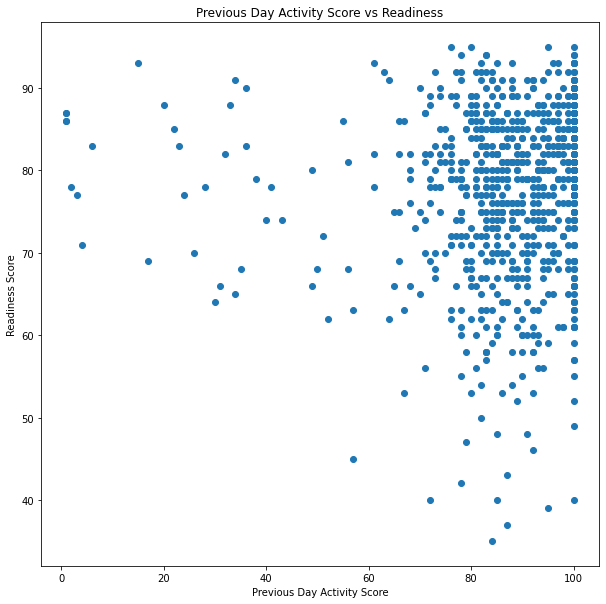

In [2989]:
# 1. Prepare data
x = df["Previous Day Activity Score"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Previous Day Activity Score vs Readiness", 
       xlabel="Previous Day Activity Score",
       ylabel="Readiness Score")

# 5. Save and show 
fig.savefig("Figures/Figure_12.png")

In [2990]:
st.header('Relevent Data')

DeltaGenerator()

In [2991]:
st.image('Figures/Figure_1.png')
st.image('Figures/Figure_2.png')
st.image('Figures/Figure_5.png')
st.image('Figures/Figure_7.png')
st.image('Figures/Figure_10.png')
st.image('Figures/Figure_11.png')
st.image('Figures/Figure_12.png')

DeltaGenerator()

## Remove data columns that are lagging data fields or not necessary

In [2992]:
df.drop(df.columns[[0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,50,51,52,53]], axis=1, inplace=True)

In [2993]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 8 to 895
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total Sleep Duration         819 non-null    float64
 1   Temperature Trend Deviation  819 non-null    float64
 2   Activity Score               819 non-null    float64
 3   Rest Time                    819 non-null    float64
 4   Readiness Score              819 non-null    float64
 5   Previous Night Score         819 non-null    float64
 6   Sleep Balance Score          819 non-null    float64
 7   Previous Day Activity Score  819 non-null    float64
 8   Activity Balance Score       819 non-null    float64
dtypes: float64(9)
memory usage: 64.0 KB


## Describe Relevent Data

In [2994]:
st.header('Describe Relevent Data')
st.write(df.describe())
df.describe()

,Total Sleep Duration,Temperature Trend Deviation,Activity Score,Rest Time,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,6.887210,0.094640,88.721612,7.851282,77.432234,77.844933,84.946276,86.744811,83.106227
std,1.367014,0.154015,8.828198,1.904681,10.285948,19.656130,13.157483,15.963577,9.735987
min,1.575000,-0.480000,0.000000,0.983333,35.000000,2.000000,24.000000,1.000000,43.000000
25%,6.095833,0.000000,84.000000,6.758333,71.500000,67.000000,78.000000,82.000000,78.000000
50%,6.950000,0.090000,92.000000,7.933333,79.000000,82.000000,86.000000,90.000000,84.000000
75%,7.708333,0.160000,95.000000,8.966667,85.000000,94.000000,96.000000,99.000000,90.000000
max,11.991667,1.240000,100.000000,13.666667,95.000000,100.000000,100.000000,100.000000,100.000000


## Algorithm/Estimator

In [2995]:
# Import algorithm/estimator

# Instantiate and fit the model (on the training set)
# Try RandomForest estimator


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# Setup random seed
np.random.seed(42)

# Create the data
df.dropna(inplace=True)
X = df.drop("Readiness Score", axis=1)
y = df["Readiness Score"] #target

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [2996]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [2997]:
model.fit(X_train, y_train);

In [2998]:
y_preds = model.predict(X_test)

In [2999]:
model.score(X_test, y_test)

0.054878048780487805

In [3000]:
# Try Ridge Regression

from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.3891282480608017

In [3001]:
# Try LassoLars

from sklearn import linear_model
model = linear_model.LassoLars(alpha=0.1)
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test) #Coefficient of determination of the prediction R^2

0.38925080239747933

In [3002]:
model.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'eps': 2.220446049250313e-16,
 'fit_intercept': True,
 'fit_path': True,
 'jitter': None,
 'max_iter': 500,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'verbose': False}

## Make Predictions Using Machine Language Model

## Pick Typical Day (2/20/2023)

In [3003]:
test_data = pd.read_csv("New Data/oura_2023-02-20_2023-02-20_trends.csv")

In [3004]:
test_data.drop(test_data.columns[[0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,50,51,52,53]], axis=1, inplace=True)

In [3005]:
## Remove Readiness Score
test_data.drop(test_data.columns[4], axis=1, inplace=True) #Drop Readiness Score
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total Sleep Duration         1 non-null      int64  
 1   Temperature Trend Deviation  1 non-null      float64
 2   Activity Score               1 non-null      int64  
 3   Rest Time                    1 non-null      int64  
 4   Previous Night Score         1 non-null      int64  
 5   Sleep Balance Score          1 non-null      int64  
 6   Previous Day Activity Score  1 non-null      int64  
 7   Activity Balance Score       1 non-null      int64  
dtypes: float64(1), int64(7)
memory usage: 196.0 bytes


In [3006]:
## Convert Total Sleep Duration to hours
test_data["Total Sleep Duration"] = test_data["Total Sleep Duration"] / 3600
test_data["Rest Time"] = test_data["Rest Time"] / 3600

In [3007]:
st.header('Data for a Typical Day (2/20/2023)')

DeltaGenerator()

In [3008]:
value = st.slider(
    'Select a estimated sleep',
    4.0, 12.0, 8.0)
st.write('Estimated Sleep:', value)
test_data["Total Sleep Duration"] = value
st.write(test_data)

## Prediction: 

In [3009]:
st.header('Based on your estimated sleep, your readiness score for 2/21/23 is prediced to be: ')
Prediction = str(model.predict(test_data))
font_size = 50

html_str = f"""
<style>
p.a {{
  font: bold {font_size}px Courier;
}}
</style>
<p class="a">{Prediction}</p>
"""

st.markdown(html_str, unsafe_allow_html=True)
#value=model.predict(test_data)

DeltaGenerator()

In [3010]:
!jupyter nbconvert --to script Capstone.ipynb
with open('Capstone.py', 'r') as f:
    lines = f.readlines()
with open('Capstone.py', 'w') as f:
    for line in lines:
        if 'nbconvert --to script' in line:
            break
        else:
            f.write(line)

[NbConvertApp] Converting notebook Capstone.ipynb to script
[NbConvertApp] Writing 9751 bytes to Capstone.py
